<a href="https://colab.research.google.com/github/MadhurimaPaul-87/OpenCV/blob/main/Major_project_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Data**

In [ ]:
# get the data from
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

#unzip the data
!unzip train.zip?dl=0

--2022-01-30 09:35:39--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2022-01-30 09:35:39--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceeb9fa5c8ecdce76f7c3090fd3.dl.dropboxusercontent.com/cd/0/inline/Bey9V8VuvSDfu4-Anxa_h9PWNl_3sOrVD59lA8PGR2spomkCe4T4beuc9XuYMZvCoyNJR0e9IACHmt0jppozS4UtpxD3HDSLjsw-Hlo_OIvb3QXqlIkRiDVvdK22lcxqQnXgDBU5aSU2xoy_9mrGPcHl/file# [following]
--2022-01-30 09:35:40--  https://uceeb9fa5c8ecdce76f7c3090fd3.dl.dropboxusercontent.com/cd/0/inline/Bey9V8VuvSDfu4-Anxa_h9PWNl_3sOrVD59lA8PGR2spomkCe4T4beuc9XuYMZvCoyNJR0e9IACHmt0jppozS4UtpxD3HD

# **Importing Relevant Libraries**

In [ ]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 3.0 MB/s 


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from keras.models import Model          #Functional API
from keras.layers import Flatten , Dense

from keras.preprocessing.image import ImageDataGenerator , img_to_array , load_img

import urllib.request
import re

# **Building our model to train the data**

In [ ]:
#Working with pretrained model

base_model = MobileNetV2(input_shape = (224,224,3), include_top = False)    #Weights

for layer in base_model.layers:         #To prevent retraining of the model!
  layer.trainable = False                   # every layer trainability is false

x= Flatten()(base_model.output)
x = Dense(units = 7 , activation='softmax')(x)

#creating our model

model = Model(base_model.input,x)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
#all the layers of the model

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

## **Preparing our data using data generator**

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range= 0.2,
    shear_range= 0.2,
    horizontal_flip= True,
    rescale= 1./255
)

train_data = train_datagen.flow_from_directory(directory="/content/train",
                                               target_size=(224,224),
                                               batch_size= 32)
train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale=1/255)
val_data = val_datagen.flow_from_directory(directory="/content/train",
                                           target_size= (224,224),
                                           batch_size= 32)

Found 350 images belonging to 7 classes.


## **Visualizing data that is fed to train datagen**

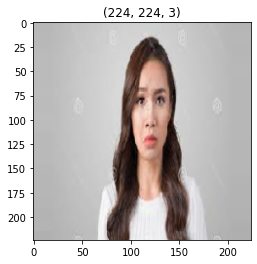

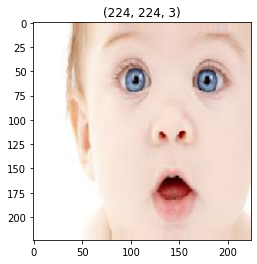

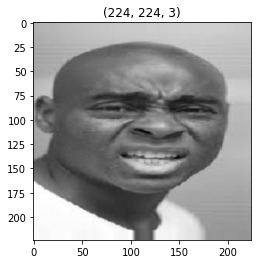

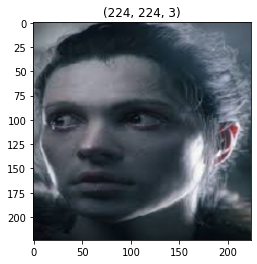

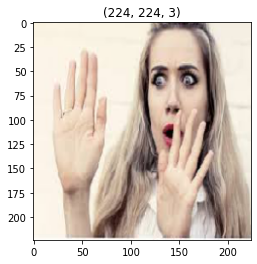

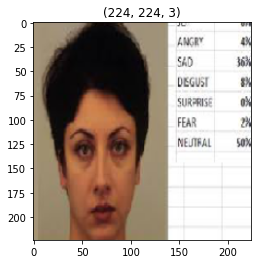

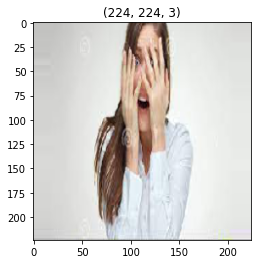

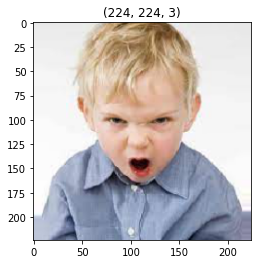

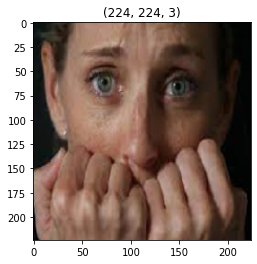

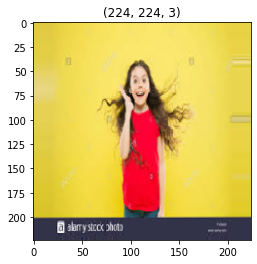

In [ ]:
t_img , label = train_data.next()

def plotImages(img_arr,label):
  count=0
  for im , l in zip(img_arr,label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count+=1
    if count == 10:
      break
plotImages(t_img,label)

## **Having early stopping and model checkpoint**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping

es = EarlyStopping(monitor= 'val_accuracy',min_delta=0.01,patience =5, verbose=1,mode= 'auto')

#model checkpoint

mc = ModelCheckpoint(filepath='best_model.h5',monitor= 'val_accuracy',verbose=1, save_best_only=True,mode= 'auto')

#putting callback in a list

callback = [es,mc]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs = 30,
                           validation_data=val_data,
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 9.1128 - accuracy: 0.2296
Epoch 00001: val_accuracy improved from -inf to 0.44571, saving model to best_model.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


10/10 [==============================] - 27s 2s/step - loss: 9.1128 - accuracy: 0.2296 - val_loss: 5.4712 - val_accuracy: 0.4457
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 5.2026 - accuracy: 0.4937
Epoch 00002: val_accuracy improved from 0.44571 to 0.64571, saving model to best_model.h5
10/10 [==============================] - 23s 2s/step - loss: 5.2026 - accuracy: 0.4937 - val_loss: 3.0551 - val_accuracy: 0.6457
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.4239 - accuracy: 0.6792
Epoch 00003: val_accuracy improved from 0.64571 to 0.71429, saving model to best_model.h5
10/10 [==============================] - 23s 2s/step - loss: 2.4239 - accuracy: 0.6792 - val_loss: 2.0753 - val_accuracy: 0.7143
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.9020 - accuracy: 0.7673
Epoch 00004: val_accuracy improved from 0.71429 to 0.86286, saving model to best_model.h5
10/10 [==============================] - 24s 2s/step - loss: 

In [ ]:
#loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5") 

In [ ]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

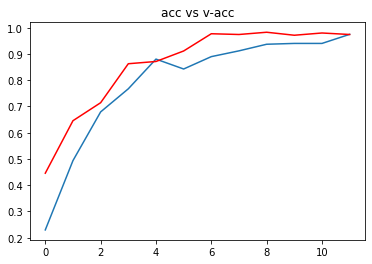

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= 'red')
plt.title("acc vs v-acc")
plt.show()

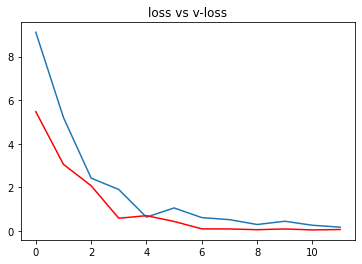

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs v-loss')
plt.show()

In [ ]:
# just to map o/p values
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise':

The image is of : Happy
https://www.youtube.com/watch?v=nRtRlmoyfyw


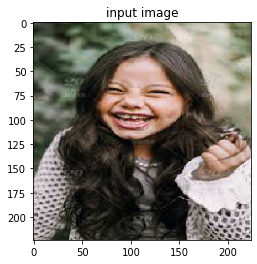

In [31]:
# path for the image to see if it predicts correct class

path = "/content/images.jpg"        #add the image path
img = load_img(path, target_size=(224,224))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f"The image is of : {op[pred]}")

if op[pred] == 'Happy':
  search_keyword="happy"
  html = urllib.request.urlopen("https://youtu.be/nRtRlmoyfyw" + search_keyword)
  video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
  print("https://www.youtube.com/watch?v=" + video_ids[0])
elif op[pred] == 'Angry':
  search_keyword="happy"
  html = urllib.request.urlopen("https://www.youtube.com/watch?v=1ZYbU82GVz4&t=596s" + search_keyword)
  video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
  print("https://www.youtube.com/watch?v=" + video_ids[0])
elif op[pred] == 'Disguist':
  search_keyword="happy"
  html = urllib.request.urlopen("https://youtu.be/7D16blZDRr8" + search_keyword)
  video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
  print("https://www.youtube.com/watch?v=" + video_ids[0])
elif op[pred] == 'Neutral':
  search_keyword="happy"
  html = urllib.request.urlopen("https://youtu.be/7D16blZDRr8" + search_keyword)
  video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
  print("https://www.youtube.com/watch?v=" + video_ids[0])
elif op[pred]== "Sad":
  search_keyword="happy"
  html = urllib.request.urlopen("https://youtu.be/RE29EUeJAb0" + search_keyword)
  video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
  print("https://www.youtube.com/watch?v=" + video_ids[0])
elif op[pred] == "Surprise":
  search_keyword="motivation"
  html = urllib.request.urlopen("https://www.youtube.com/watch?v=6qWpSewDy5Y" + search_keyword)
  video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
  print("https://www.youtube.com/watch?v=" + video_ids[0])
elif op[pred] == "Fear":
  search_keyword="brave"
  html = urllib.request.urlopen("https://youtu.be/7D16blZDRr8" + search_keyword)
  video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
  print("https://www.youtube.com/watch?v=" + video_ids[0])
else:
  search_keyword="happy"
  html = urllib.request.urlopen("https://youtu.be/7D16blZDRr8" + search_keyword)
  video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
  print("https://www.youtube.com/watch?v=" + video_ids[0])

# to display the image

plt.imshow(input_arr[0])
plt.title('input image')
plt.show()